In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/Etie043/Schulich_data_science-/refs/heads/main/test.csv', delimiter=';')

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

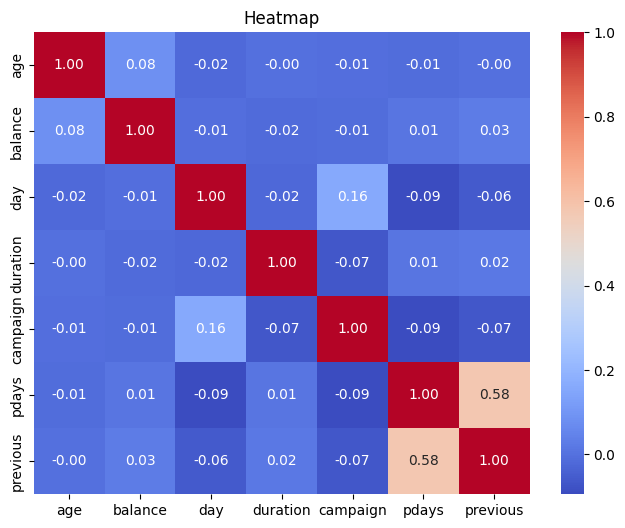

In [23]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

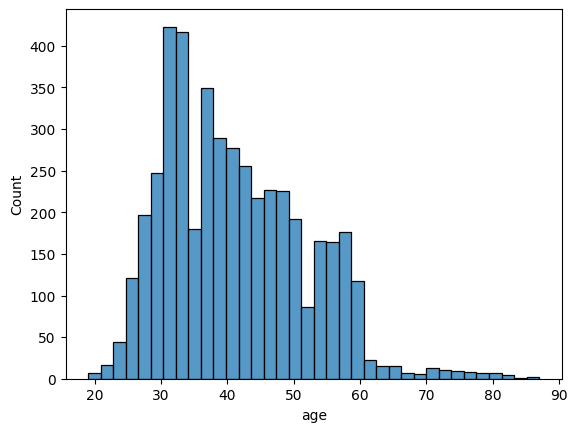

In [13]:
sns.histplot (x=data['age'])

<Axes: xlabel='education', ylabel='Count'>

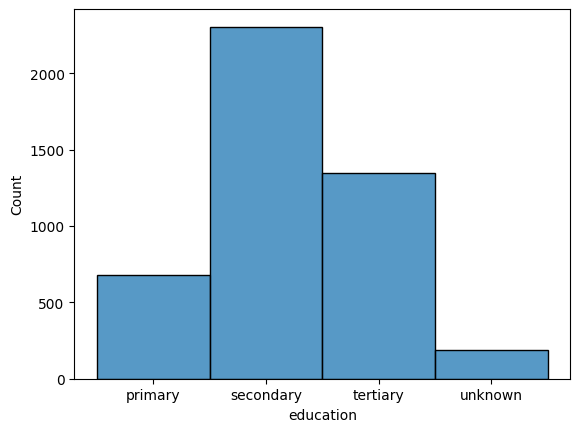

In [14]:
sns.histplot(x=data['education'])

<Axes: xlabel='marital', ylabel='Count'>

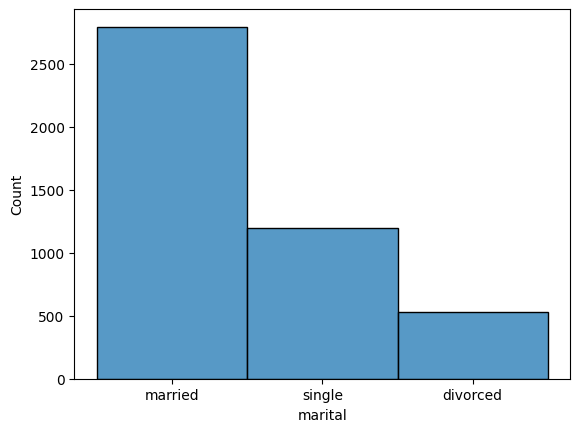

In [16]:
sns.histplot(x=data['marital'])

<Axes: xlabel='housing', ylabel='Count'>

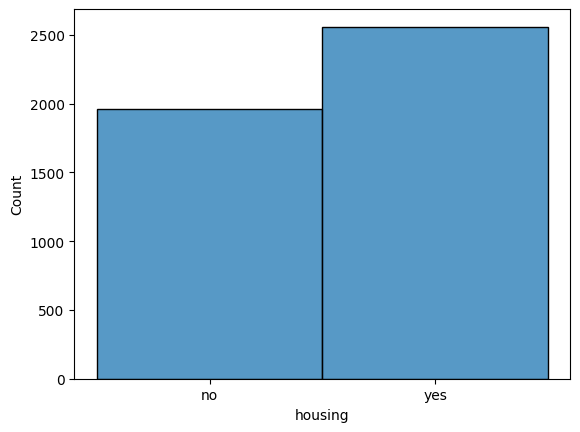

In [17]:
# has a housing loan
sns.histplot(x=data['housing'])

<Axes: xlabel='default', ylabel='Count'>

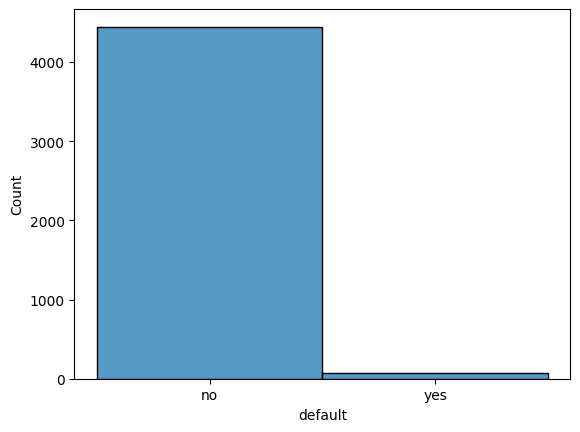

In [18]:
# has credit in default
sns.histplot(x=data['default'])

<Axes: xlabel='loan', ylabel='Count'>

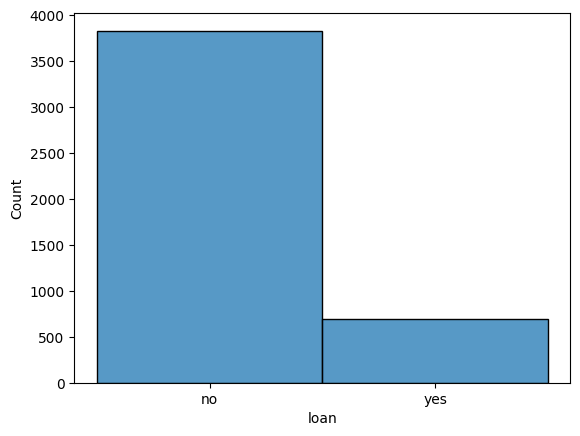

In [19]:
# has personal loan
sns.histplot(x=data['loan'])

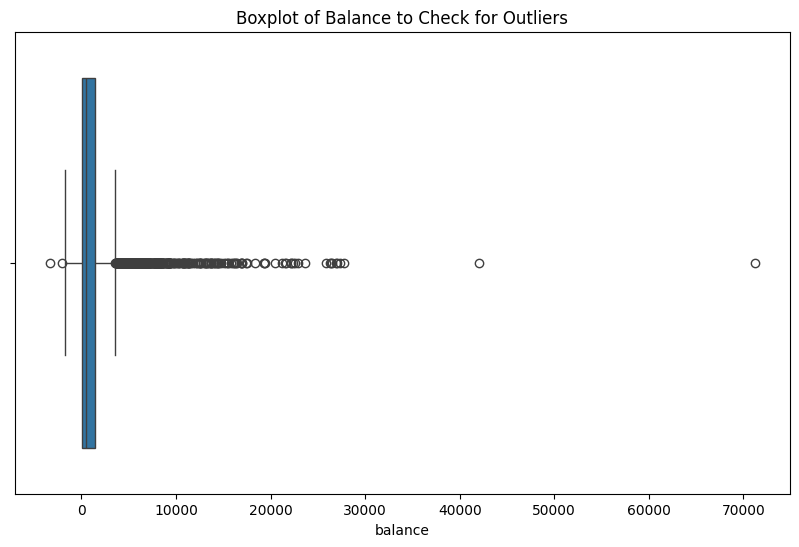

In [22]:
# Boxplot for Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['balance'])
plt.title('Boxplot of Balance to Check for Outliers')
plt.show()

this distribution is right skewed as few customers have a significant higher balances than the rest.

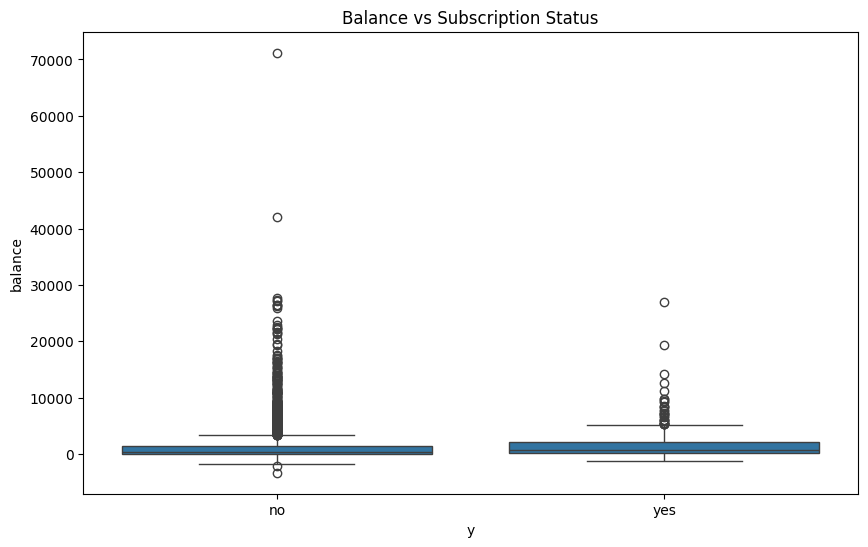

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=data)
plt.title('Balance vs Subscription Status')
plt.show()


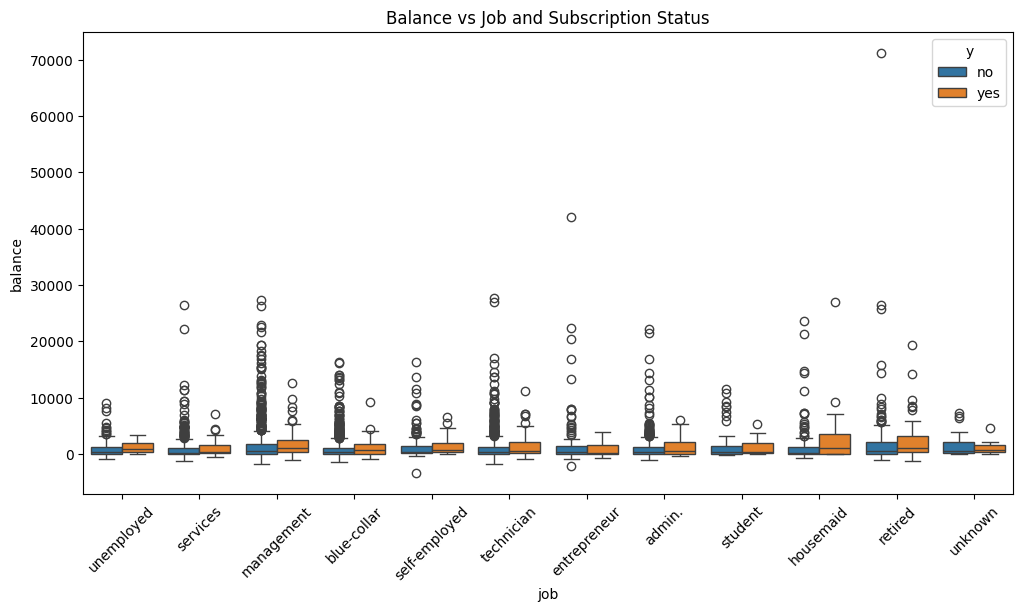

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance', hue='y', data=data)
plt.title('Balance vs Job and Subscription Status')
plt.xticks(rotation=45)
plt.show()


 A notable observation is that retired clients who subscribed tend to have higher balances compared to those who did not. This group shows a more significant positive relationship between balance and subscription. Entreprenuer has a similar trend to retired, client with higher balances tend to subscribe more.

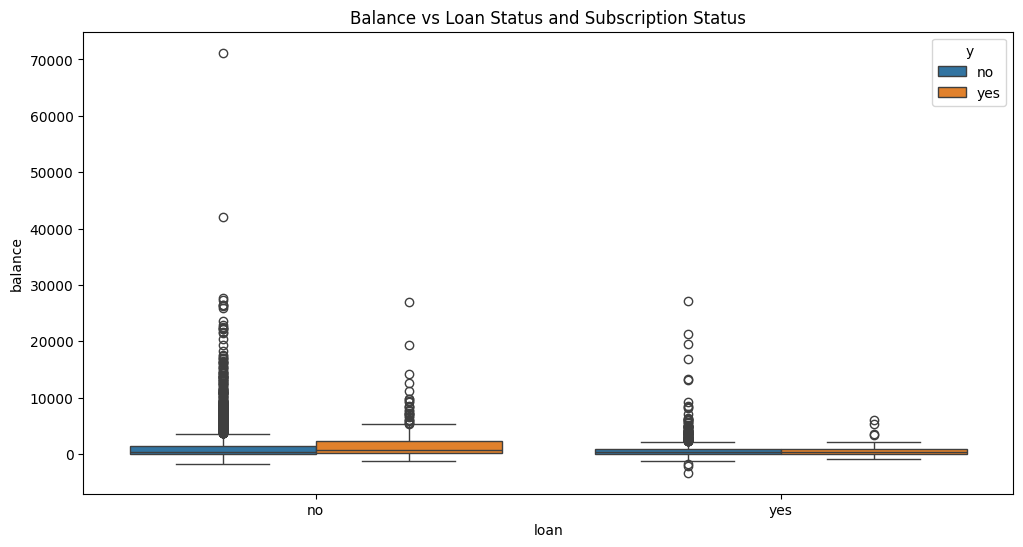

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan', y='balance', hue='y', data=data)
plt.title('Balance vs Loan Status and Subscription Status')
plt.show()


Clients without loans who subscirbed tend to have higher balance suggesting that having no loan may give them more finanical flexibility to invest in a term. While at the other side there is little difference in balance betweeb those who subscribed and those who didnt  for clients with a loan, inidicating a loan might limit the likehood of subscribing, irrespective of balance.